# Apology Visualizations Notebook

In [695]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

sub_month_df = pd.read_csv('social_blade_combined.csv')

lifestyle_youtubers = pd.read_csv('social_blade_lifestyle.csv')
beauty_youtubers = pd.read_csv('social_blade_beauty.csv')
commentary_youtubers = pd.read_csv('social_blade_commentary.csv')

outliers_removed = pd.read_csv('social_blade_outliers_removed.csv')

likes_under_20 = pd.read_csv('social_blade_likes_under20.csv')
likes_over_95 = pd.read_csv('social_blade_likes_over95.csv')

likes_over_95 = likes_over_95[likes_over_95["Name"].str.contains("Zamora") == False]
likes_over_95 = likes_over_95.reset_index(drop=True)

In [651]:
# Function that creates a list of channel names in a dataframe
def dropNames (name_data):
    listName = name_data
    listName = listName.drop_duplicates() # Removes duplicate names
    listName = listName.reset_index(drop=True) # Renumbers the series
    return listName

# Function that converts hh:mm:ss formats into seconds
def time_to_seconds(duration):
    h, m, s = map(int, duration.split(':'))
    return h * 3600 + m * 60 + s

# Converts numbers in string format into numerical formats
def convert_df_values (dataframe): 
    # Converts dates into numerical dates
    dataframe['Date Posted'] = pd.to_datetime(dataframe['Date Posted']).dt.date
    dataframe['Date Joined'] = pd.to_datetime(dataframe['Date Joined']).dt.date
    
    subcount = ["Sub Count - Day Before", "Sub Count - 1 Day After", "Sub Count - 1 Week After",
                "Sub Count - 1 Month After", "Sub Count - 6 Months After", "Sub Count - Current"]
    for i in range(len(dataframe)):
        # Converts duration values into seconds
        secDuration = time_to_seconds(dataframe['Duration'][i])
        dataframe['Duration'][i] = secDuration

        # Converts all likes percentages into decimals
        likes_pct = dataframe['Video Likes Percentage'][i]
        if '%' in likes_pct: 
            likes_pct = float((dataframe['Video Likes Percentage'][i]).strip('%'))
            dataframe['Video Likes Percentage'][i] = likes_pct
        else:
            dataframe['Video Likes Percentage'][i] = 0
        
        for count in subcount:
            if pd.isna(dataframe[count][i]) == False :
                dataframe[count][i] = int(dataframe[count][i])
    return dataframe

In [714]:
# Imports apology CSV
apology_metadata_df = pd.read_csv('apology_videos_80_YT.csv')
apology_metadata_df = convert_df_values(apology_metadata_df)

/var/folders/ts/9x8sw2z502vcqq0v__1pg46c0000gn/T/ipykernel_15713/662253668.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Duration'][i] = secDuration
/var/folders/ts/9x8sw2z502vcqq0v__1pg46c0000gn/T/ipykernel_15713/662253668.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Video Likes Percentage'][i] = likes_pct
/var/folders/ts/9x8sw2z502vcqq0v__1pg46c0000gn/T/ipykernel_15713/662253668.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [652]:
# Creates channel name lists
names = dropNames(sub_month_df['Name'])
outliers_names = dropNames(outliers_removed['Name'])
lifestyle_names = dropNames(lifestyle_youtubers['Name'])
beauty_names = dropNames(beauty_youtubers['Name'])
commentary_names = dropNames(commentary_youtubers['Name'])
under_20 = dropNames(likes_under_20['Name'])
over_95 = dropNames(likes_over_95['Name'])

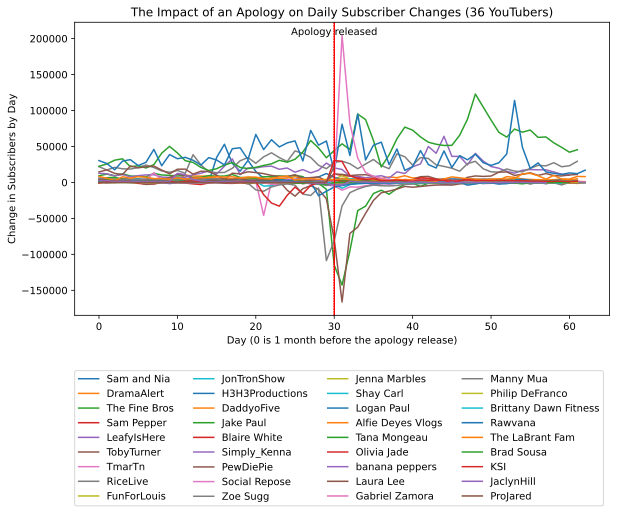

In [640]:
plt.figure(figsize=(6.4*1.5,3.6*1.5))

for i in range(len(names)):
    df = sub_month_df[sub_month_df.Name==names[i]]
    plt.plot(np.arange(len(df.index)), pd.to_numeric(df.Subs), label = df.Name.values[0])
    plt.axvline(x=30, color='red', linestyle='dashed',linewidth=0.5)
    plt.ylabel('Change in Subscribers by Day')
    plt.xlabel("Day (0 is 1 month before the apology release)")
    plt.legend(ncol=4, loc=(0, -0.65))
    count +=1

plt.annotate('Apology released', xy=(30, 205000), ha='center', size=10)
plt.title('The Impact of an Apology on Daily Subscriber Changes (36 YouTubers)')
plt.savefig('apology_impact_all.png', dpi = 100, bbox_inches = "tight")
# df.plot.line(x=np.arange(62), y=pd.to_numeric(df.Subs))

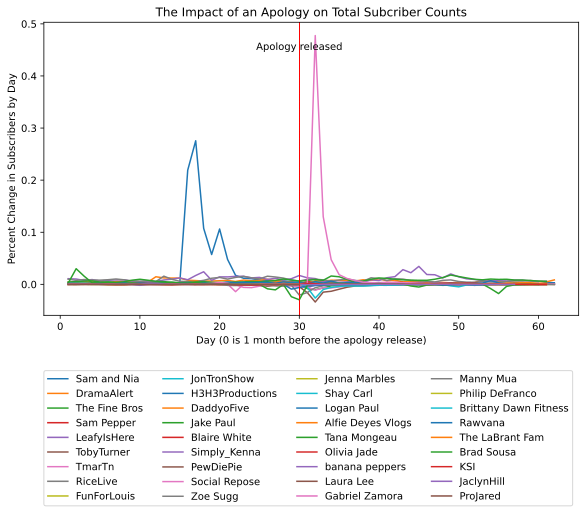

In [293]:
plt.figure(figsize=(6.4*1.5,3.6*1.5))
for i in range(len(names)):
#     pd.to_numeric(df.Subs).plot.line()
    df = sub_month_df[sub_month_df.Name==names[i]]
    plt.plot(np.arange(len(df.index)), pd.to_numeric(df.Subs_Total).pct_change(), label = df.Name.values[0])
    plt.axvline(x=30, color='red', linestyle='dashed',linewidth=0.5)
    plt.ylabel('Percent Change in Subscribers by Day')
    plt.xlabel("Day (0 is 1 month before the apology release)")
    plt.legend(ncol=4, loc=(0, -0.65))
plt.annotate('Apology released', xy=(30, 0.45), ha='center', size=10)
plt.title('The Impact of an Apology on Total Subcriber Counts (36 YouTubers)')
plt.savefig('pct_all.png', dpi = 100, bbox_inches = "tight")

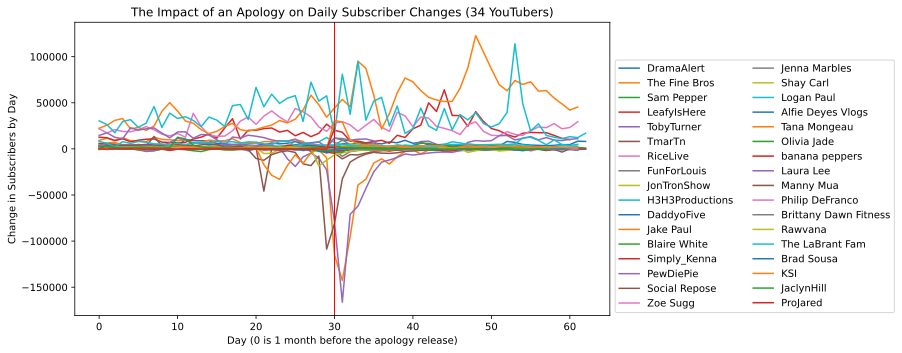

In [304]:
plt.figure(figsize=(6.4*1.5,3.6*1.5))
for i in range(len(outliers_names)):
    df = outliers_removed[outliers_removed.Name==outliers_names[i]]
    plt.plot(np.arange(len(df.index)), pd.to_numeric(df.Subs), label = df.Name.values[0])
    plt.axvline(x=30, color='red', linestyle='dashed',linewidth=0.5)
    plt.ylabel('Change in Subscribers by Day')
    plt.xlabel("Day (0 is 1 month before the apology release)")
    plt.legend(ncol=2, loc=(1.01, 0.01))

plt.annotate('Apology released', xy=(30, 205000), ha='center', size=10)
plt.title('The Impact of an Apology on Daily Subscriber Changes (34 YouTubers)')
plt.savefig('apology_impact_outliers_removed.png', dpi = 100, bbox_inches = "tight")
# df.plot.line(x=np.arange(62), y=pd.to_numeric(df.Subs))

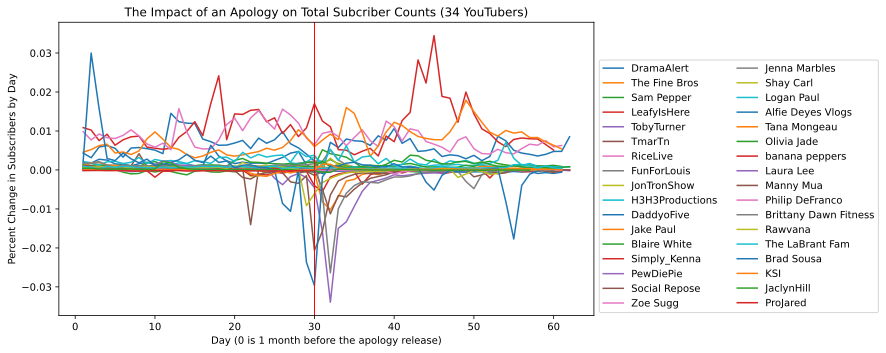

In [306]:
plt.figure(figsize=(6.4*1.5,3.6*1.5))
for i in range(len(outliers_names)):
    df = outliers_removed[outliers_removed.Name==outliers_names[i]]
    plt.plot(np.arange(len(df.index)), pd.to_numeric(df.Subs_Total).pct_change(), label = df.Name.values[0])
    plt.axvline(x=30, color='red', linestyle='dashed',linewidth=0.5)
    plt.ylabel('Percent Change in Subscribers by Day')
    plt.xlabel("Day (0 is 1 month before the apology release)")
    plt.legend(ncol=2, loc=(1.01, 0.01))
plt.annotate('Apology released', xy=(30, 0.45), ha='center', size=10)
plt.title('The Impact of an Apology on Total Subcriber Counts (34 YouTubers)')
plt.savefig('pct_outliers_removed.png', dpi = 100, bbox_inches = "tight")

In [641]:
# Functions that graph subscriber counts
def graph_change_in_subs (name_list, subs_data, legend, numCol):
    plt.figure(figsize=(6.4*1.5,3.6*1.5))

    for i in range(len(name_list)):
        df = subs_data[subs_data.Name==name_list[i]]
        plt.plot(np.arange(len(df.index)), pd.to_numeric(df.Subs), label = df.Name.values[0], color = colours[i])
        plt.axvline(x=30, color='red', linestyle='dashed',linewidth=0.5)
        plt.ylabel('Change in Subscribers by Day')
        plt.xlabel("Day (0 is 1 month before the apology release)")
        plt.legend(ncol=numCol, loc=(legend))

def graph_percent_change_in_subs(name_list, subs_data, legend, numCol):
    plt.figure(figsize=(6.4*1.5,3.6*1.5))
    
    for i in range(len(name_list)):
        df = subs_data[subs_data.Name==name_list[i]]
        plt.plot(np.arange(len(df.index)), pd.to_numeric(df.Subs_Total).pct_change(), label = df.Name.values[0], color = colours[i])
        plt.axvline(x=30, color='red', linestyle='dashed',linewidth=0.5)
        plt.ylabel('Percent Change in Subscribers by Day')
        plt.xlabel("Day (0 is 1 month before the apology release)")
        plt.legend(ncol=numCol, loc=(legend))

# Lifestyle YouTubers

In [655]:
# 11 different colours
colours = ['#8c564b', '#ff7f0e', 'red', 'dodgerblue', 'gold', '#9467bd', 'mediumseagreen', 'darkcyan', 'deepskyblue','black', 'hotpink']

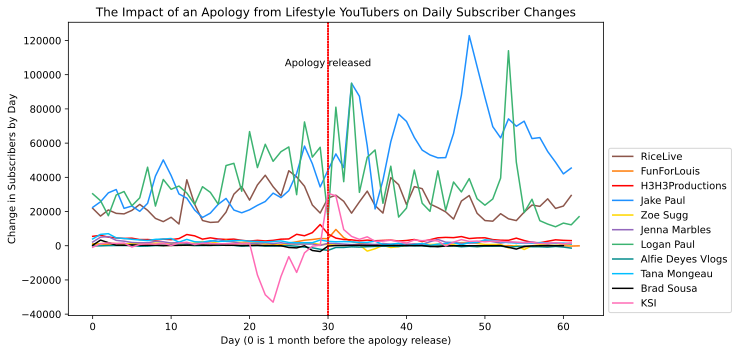

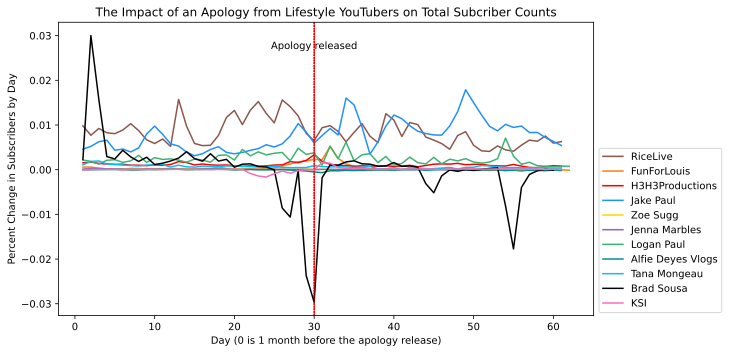

In [341]:
# Graphing daily change in subscriber count
graph_change_in_subs (lifestyle_names, lifestyle_youtubers, (1.01, 0.01), 1)

plt.annotate('Apology released', xy=(30, 105000), ha='center', size=10)
plt.title('The Impact of an Apology from Lifestyle YouTubers on Daily Subscriber Changes')
plt.savefig('apology_impact_lifestyle.png', dpi = 100, bbox_inches = "tight")

# Graphing percent change in total subscriber count
graph_percent_change_in_subs (lifestyle_names, lifestyle_youtubers, (1.01, 0.01), 1)

plt.annotate('Apology released', xy=(30, 0.027), ha='center', size=10)
plt.title('The Impact of an Apology from Lifestyle YouTubers on Total Subcriber Counts')
plt.savefig('pct_lifestyle.png', dpi = 100, bbox_inches = "tight")

# Beauty YouTubers

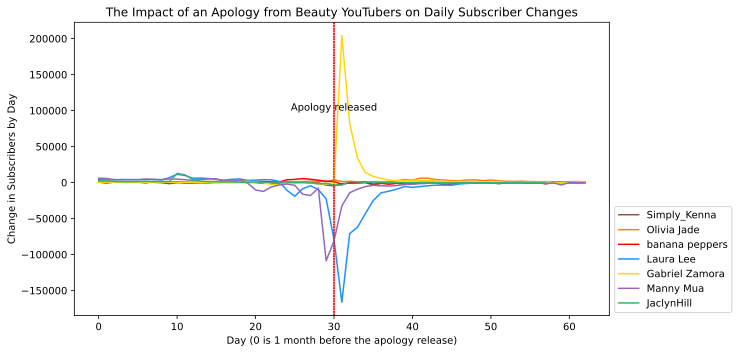

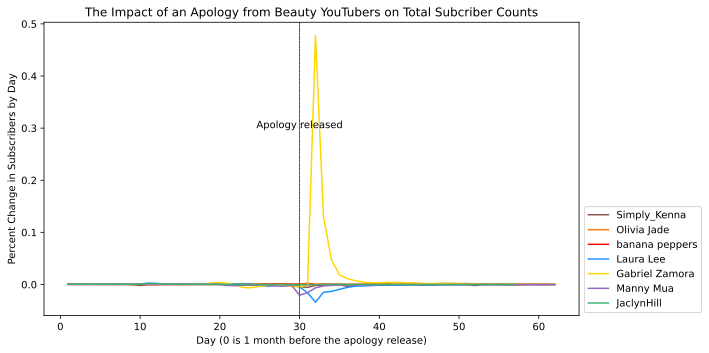

In [342]:
# Graphing daily change in subscriber count
graph_change_in_subs (beauty_names, beauty_youtubers, (1.01, 0.01), 1)

plt.annotate('Apology released', xy=(30, 100000), ha='center', size=10)
plt.title('The Impact of an Apology from Beauty YouTubers on Daily Subscriber Changes')
plt.savefig('apology_impact_beauty.png', dpi = 100, bbox_inches = "tight")

# Graphing percent change in total subscriber count
graph_percent_change_in_subs (beauty_names, beauty_youtubers, (1.01, 0.01), 1)

plt.annotate('Apology released', xy=(30, 0.3), ha='center', size=10)
plt.title('The Impact of an Apology from Beauty YouTubers on Total Subcriber Counts')
plt.savefig('pct_beauty.png', dpi = 100, bbox_inches = "tight")

# Commentary YouTubers

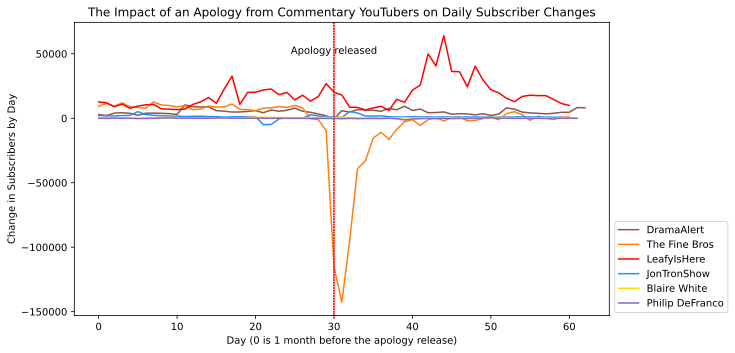

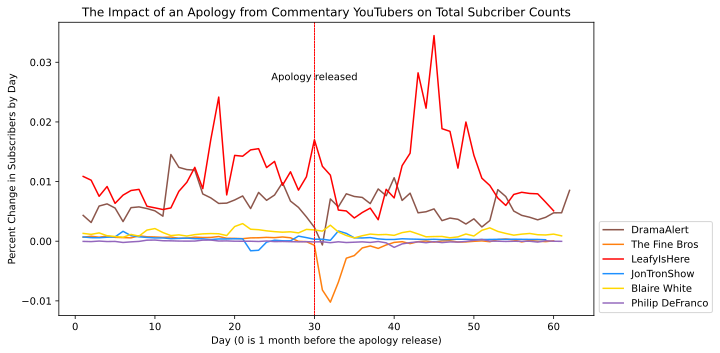

In [343]:
# Graphing daily change in subscriber count
graph_change_in_subs (commentary_names, commentary_youtubers, (1.01, 0.01), 1)

plt.annotate('Apology released', xy=(30, 50000), ha='center', size=10)
plt.title('The Impact of an Apology from Commentary YouTubers on Daily Subscriber Changes')
plt.savefig('apology_impact_commentary.png', dpi = 100, bbox_inches = "tight")

# Graphing percent change in total subscriber count
graph_percent_change_in_subs (commentary_names, commentary_youtubers, (1.01, 0.01), 1)

plt.annotate('Apology released', xy=(30, 0.027), ha='center', size=10)
plt.title('The Impact of an Apology from Commentary YouTubers on Total Subcriber Counts')
plt.savefig('pct_commentary.png', dpi = 100, bbox_inches = "tight")

# Apology Impacts by Likes Percentage

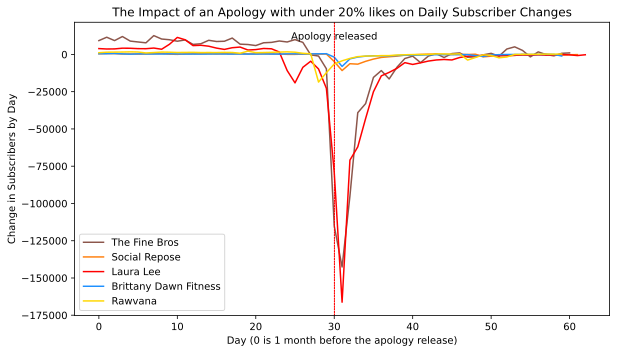

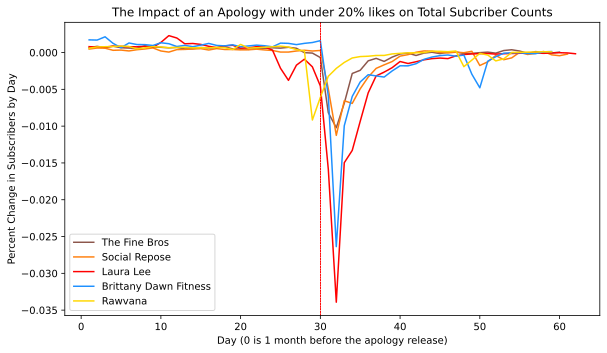

In [347]:
# Graphing daily change in subscriber count
graph_change_in_subs (under_20, likes_under_20,('best'), 1)

plt.annotate('Apology released', xy=(30, 10000), ha='center', size=10)
plt.title('The Impact of an Apology with under 20% likes on Daily Subscriber Changes')
plt.savefig('apology_impact_likes_under20.png', dpi = 100, bbox_inches = "tight")

# Graphing percent change in total subscriber count
graph_percent_change_in_subs (under_20, likes_under_20, ('best'), 1)

plt.annotate('Apology released', xy=(30, 0.027), ha='center', size=10)
plt.title('The Impact of an Apology with under 20% likes on Total Subcriber Counts')
plt.savefig('pct_likes_under20.png', dpi = 100, bbox_inches = "tight")

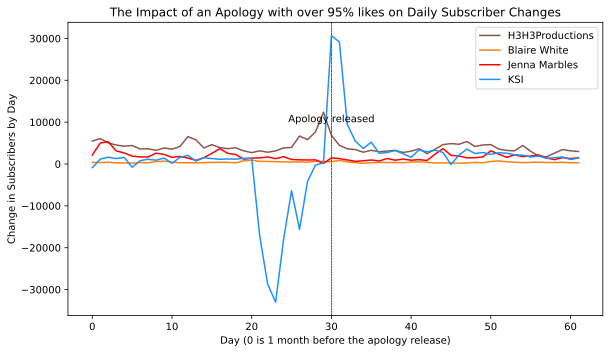

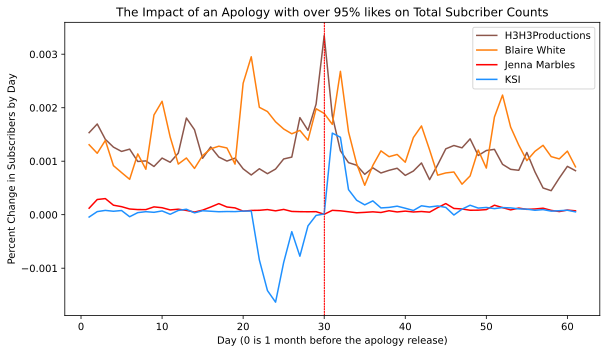

In [683]:
# Graphing daily change in subscriber count
graph_change_in_subs (over_95, likes_over_95,('best'), 1)

plt.annotate('Apology released', xy=(30, 10000), ha='center', size=10)
plt.title('The Impact of an Apology with over 95% likes on Daily Subscriber Changes')
plt.savefig('apology_impact_likes_over95.png', dpi = 100, bbox_inches = "tight")

# Graphing percent change in total subscriber count
graph_percent_change_in_subs (over_95, likes_over_95, ('best'), 1)

plt.annotate('Apology released', xy=(30, 0.027), ha='center', size=10)
plt.title('The Impact of an Apology with over 95% likes on Total Subcriber Counts')
plt.savefig('pct_likes_over95.png', dpi = 100, bbox_inches = "tight")

# Likes vs Duration Scatterplot

In [718]:
# Creates new dataframe based on metadata CSV that removes any videos without likes
likes_duration_df = pd.read_csv('apology_videos_80_YT.csv')
likes_duration_df = likes_duration_df[likes_duration_df["Video Likes Percentage"].str.contains("%") == True]             
likes_duration_df = likes_duration_df.reset_index(drop=True)
likes_duration_df = convert_df_values(likes_duration_df)

/var/folders/ts/9x8sw2z502vcqq0v__1pg46c0000gn/T/ipykernel_15713/662253668.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Duration'][i] = secDuration
/var/folders/ts/9x8sw2z502vcqq0v__1pg46c0000gn/T/ipykernel_15713/662253668.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Video Likes Percentage'][i] = likes_pct
/var/folders/ts/9x8sw2z502vcqq0v__1pg46c0000gn/T/ipykernel_15713/662253668.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [687]:
likes_duration_df

,ID #,ID Name,ID,YouTuber,Channel,Title,Date Posted,Duration,Original Video Source,Video Likes Percentage,...,Country of Origin,Reason,Date Joined,Subs Source,Sub Count - Day Before,Sub Count - 1 Day After,Sub Count - 1 Week After,Sub Count - 1 Month After,Sub Count - 6 Months After,Sub Count - Current
0,1,Austin,001_Austin,Austin Jones,Austin Jones,Setting the Record Straight,6/29/2015,1008,https://www.youtube.com/watch?v=niaIgUQsbDc,24.61,...,USA,grooming,"Jul 3, 2007",https://socialblade.com/youtube/user/ausdudepro,NaN,NaN,NaN,NaN,"110,089","534,359"
1,2,SamNia,002_SamNia,"Samuel, NiaChel Rader",Sam and Nia,FORGIVEN,8/21/2015,158,https://www.youtube.com/watch?v=ilFuzKURvhk,21.08,...,USA,infidelity,"Mar 8, 2007",https://socialblade.com/youtube/c/samandnia,"359,126","360,609","364,489","371,862","411,763","2,540,000"
2,3,Keem,003_Keem,Daniel Keem (Keemstar),DramaAlert,We got it wrong. - I'm sorry & will do better.,1/9/2016,357,https://www.youtube.com/watch?v=2JMZWMJVNe8,23.72,...,USA,lying/misinformation,"Jun 16, 2014",https://socialblade.com/youtube/c/dramaalert,NaN,"831,137","852,871","1,017,707","1,441,038","5,530,000"
3,4,Fine,004_Fine,Benny and Rafi Fine,The Fine Bros,Update.,1/31/2016,186,https://www.youtube.com/watch?v=0t-vuI9vKfg,14.86,...,USA,scamming,"Jun 4, 2007",https://socialblade.com/youtube/c/react___,"14,069,122","13,811,425","13,601,594","13,590,787","14,193,425","20,000,000"
4,5,Pepper,005_Pepper,Sam Pepper,Sam Pepper,i'm sorry,2/24/2016,1203,https://youtu.be/DPxb892BaV8,49.37,...,England,exploitative content,"Sep 8, 2010",https://socialblade.com/youtube/c/sam,"2,294,244","2,318,145","2,339,699","2,329,926","2,261,200","2,130,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,76,Liver,076_Liver,Brian Johnson,The Liver King,Liver King Confession... I Lied.,12/1/2022,393,https://www.youtube.com/watch?v=q_Vd7i4ZpgA,24.02,...,USA,lying/misinformation,"Oct 12, 2021",https://socialblade.com/youtube/channel/UCI_-0...,"217,000","226,000","236,000","247,000",NaN,"259,000"
66,77,Nadia,077_Nadia,Nadia,Nadia,Why I Got Banned On Twitch,12/16/2022,160,https://www.youtube.com/watch?v=RemmkDdj1Jw,13.75,...,USA,harassment,"Aug 30, 2010",https://socialblade.com/youtube/c/nadia__,NaN,NaN,NaN,NaN,NaN,"324,000"
67,78,Adin,078_Adin,Adin Ross,Adin Live,I failed you guys 😞,1/22/2023,151,https://www.youtube.com/watch?v=L5GOcmLSdCo,98.32,...,USA,lying/misinformation,"Aug 15, 2014",https://socialblade.com/youtube/user/splashstr...,"3,430,000","3,450,000","3,490,000","3,530,000",NaN,"3,590,000"
68,79,Pearl,079_Pearl,Pearl Davis,Justpearlythings,Justpearlythings Addresses Nick Fuentes Interview,3/26/2023,748,https://www.youtube.com/watch?v=6L_2-4pR-so,22.31,...,USA,racism,"Apr 5, 2020",https://socialblade.com/youtube/channel/UCyR3j...,"1,370,000","1,370,000","1,390,000",NaN,NaN,"1,400,000"


In [ ]:
# Function that plots scatterplot
def plot_likes_duration (colours, legendType):
    plt.figure(figsize=(6.4*1.5,3.6*1.5))
    plt.scatter(x=likes_duration_df['Video Likes Percentage'], y=likes_duration_df['Duration'], c=legendType.map(colours))
    plt.xlabel("Video Likes Percentage")
    plt.ylabel("Duration (seconds)")
    plt.title('The Impact of Duration on Apology Reception (70 Apologies)')
    # Lines to distinguish minutes
    plt.axhline(y=60, color='red', linestyle='dashed',linewidth=0.5)
    plt.axhline(y=300, color='red', linestyle='dashed',linewidth=0.5)
    plt.axhline(y=600, color='red', linestyle='dashed',linewidth=0.5)
    plt.axhline(y=900, color='red', linestyle='dashed',linewidth=0.5)
    plt.axhline(y=1800, color='red', linestyle='dashed',linewidth=0.5)
    plt.axhline(y=3600, color='red', linestyle='dashed',linewidth=0.5)
    # Labels for minutes
    plt.annotate('1 min', xy=(110, 0), ha='center', size=8, annotation_clip=False)
    plt.annotate('5 min', xy=(110, 220), ha='center', size=8, annotation_clip=False)
    plt.annotate('10 min', xy=(110, 520), ha='center', size=8, annotation_clip=False)
    plt.annotate('15 min', xy=(110, 820), ha='center', size=8, annotation_clip=False)
    plt.annotate('30 min', xy=(110, 1720), ha='center', size=8, annotation_clip=False)
    plt.annotate('1 hr', xy=(110, 3520), ha='center', size=8, annotation_clip=False)

### Dots coloured by video status

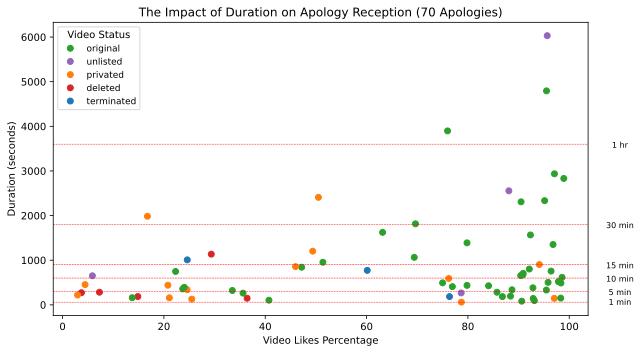

In [608]:
colours = {'original':'tab:green', 'unlisted':'tab:purple', 'privated':'tab:orange', 'deleted':'tab:red', 'terminated':'tab:blue'}
plot_likes_duration(colours, likes_duration_df['Video Status'])
# Legend
markers = [plt.Line2D([0,0],[0,0],color=colour, marker='o', linestyle='') for colour in colours.values()]
plt.legend(markers, colours.keys(), numpoints=1, ncol=1, fontsize="9", title="Video Status")
plt.savefig('likes_duration_status_graph.png', dpi = 100, bbox_inches = "tight")

### Dots coloured by apology reason

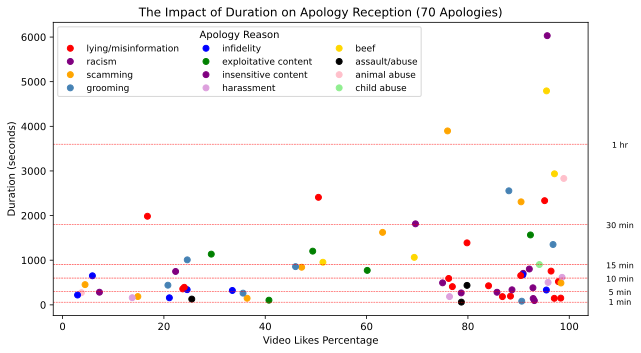

In [615]:
colours = {'lying/misinformation':'red', 'racism':'purple', 'scamming':'orange', 
           'grooming':'steelblue', 'infidelity':'blue', 'exploitative content':'green', 
           'insensitive content':'purple', 'harassment':'plum', 'beef':'gold', 
           'assault/abuse':'black', 'animal abuse':'pink', 'child abuse':'lightgreen',}
plot_likes_duration(colours, likes_duration_df['Reason'])
# Legend
markers = [plt.Line2D([0,0],[0,0],color=colour, marker='o', linestyle='') for colour in colours.values()]
plt.legend(markers, colours.keys(), numpoints=1, ncol=3, fontsize="9", title="Apology Reason")
plt.savefig('likes_duration_reason_graph.png', dpi = 100, bbox_inches = "tight")

### Dots coloured by channel type

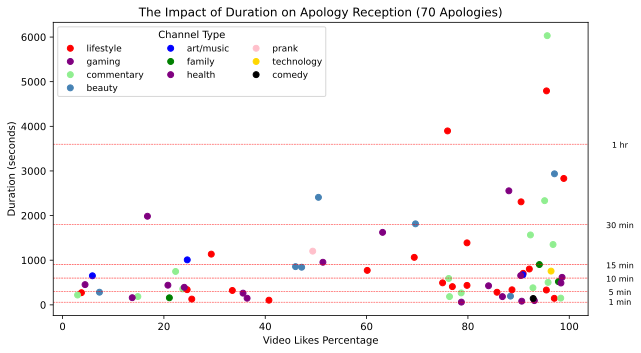

In [620]:
colours = {'lifestyle':'red', 'gaming':'purple', 'commentary':'lightgreen', 'beauty':'steelblue', 
           'art/music':'blue', 'family':'green', 'health':'purple', 'prank':'pink', 'technology':'gold', 'comedy':'black'}
plot_likes_duration(colours, likes_duration_df['Channel Type'])
# Legend
markers = [plt.Line2D([0,0],[0,0],color=colour, marker='o', linestyle='') for colour in colours.values()]
plt.legend(markers, colours.keys(), numpoints=1, ncol=3, fontsize="9", title="Channel Type")
plt.savefig('likes_duration_channel_graph.png', dpi = 100, bbox_inches = "tight")

# Subscriber Difference after 6 Months

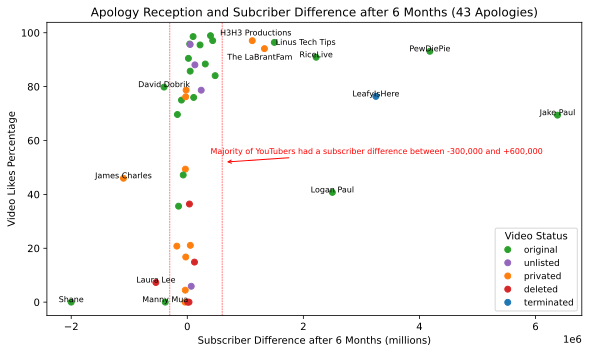

In [823]:
six_month_df=apology_metadata_df.dropna(subset=['Sub Count - Day Before','Sub Count - 6 Months After'])
six_month_df = six_month_df.reset_index(drop=True)

sub_diff = []
for i in range(len(six_month_df)):
    diff = (six_month_df['Sub Count - 6 Months After'][i]) - (six_month_df['Sub Count - Day Before'][i])
    sub_diff.append(diff)

colours = {'original':'tab:green', 'unlisted':'tab:purple', 'privated':'tab:orange', 'deleted':'tab:red', 'terminated':'tab:blue'}
plt.figure(figsize=(6.4*1.5,3.6*1.5))    
plt.scatter(x=sub_diff, y=six_month_df['Video Likes Percentage'], c=six_month_df['Video Status'].map(colours))

plt.xlabel("Subscriber Difference after 6 Months (millions)")
plt.ylabel("Video Likes Percentage")
plt.title('Apology Reception and Subcriber Difference after 6 Months (43 Apologies)')

for i in range(len(six_month_df)):
    if (sub_diff[i] > 2000000) or (sub_diff[i] < -300000):
        plt.annotate(six_month_df['Channel'][i], xy=(sub_diff[i], six_month_df['Video Likes Percentage'][i]), ha='center', size=8)

plt.axvline(x=-300000, color='red', linestyle='dashed',linewidth=0.5)
plt.axvline(x=600000, color='red', linestyle='dashed',linewidth=0.5)
plt.annotate('H3H3 Productions', xy=(1180000, 99), ha='center', size=8)
plt.annotate('The LaBrantFam', xy=(1250000, 90), ha='center', size=8)
plt.annotate('Linus Tech Tips', xy=(2040000, 95.5), ha='center', size=8)
    
plt.annotate('Majority of YouTubers had a subscriber difference between -300,000 and +600,000 ', xy=(650000, 52),
             xytext=(400000, 55), fontsize=8, arrowprops=dict(arrowstyle="->", color='red'), c='red')
    
# Legend
markers = [plt.Line2D([0,0],[0,0],color=colour, marker='o', linestyle='') for colour in colours.values()]
plt.legend(markers, colours.keys(), numpoints=1, ncol=1, fontsize="9", loc='lower right', title="Video Status")
plt.savefig('sub_diff_6months.png', dpi = 100, bbox_inches = "tight")

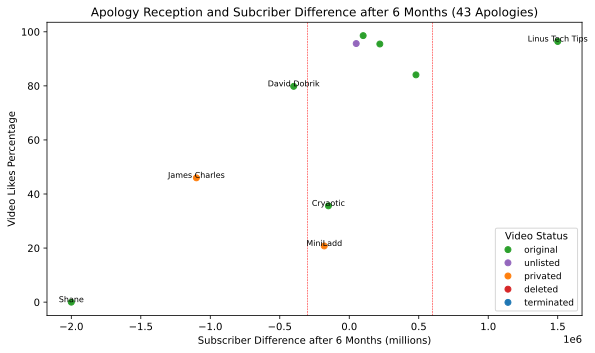

In [854]:
six_month_df_2019 = six_month_df[six_month_df['Date Posted'].astype(str).str.contains("202") == True]
six_month_df_2019 = six_month_df_2019.reset_index(drop=True)

sub_diff = []
for i in range(len(six_month_df_2019)):
    diff = (six_month_df_2019['Sub Count - 6 Months After'][i]) - (six_month_df_2019['Sub Count - Day Before'][i])
    sub_diff.append(diff)

colours = {'original':'tab:green', 'unlisted':'tab:purple', 'privated':'tab:orange', 'deleted':'tab:red', 'terminated':'tab:blue'}
plt.figure(figsize=(6.4*1.5,3.6*1.5))    
plt.scatter(x=sub_diff, y=six_month_df_2019['Video Likes Percentage'], c=six_month_df_2019['Video Status'].map(colours))

plt.xlabel("Subscriber Difference after 6 Months (millions)")
plt.ylabel("Video Likes Percentage")
plt.title('Apology Reception and Subcriber Difference after 6 Months (43 Apologies)')

for i in range(len(six_month_df_2019)):
    if (sub_diff[i] > 1000000) or (sub_diff[i] < -1):
        plt.annotate(six_month_df_2019['Channel'][i], xy=(sub_diff[i], six_month_df_2019['Video Likes Percentage'][i]), ha='center', size=8)

plt.axvline(x=-300000, color='red', linestyle='dashed',linewidth=0.5)
plt.axvline(x=600000, color='red', linestyle='dashed',linewidth=0.5)
plt.annotate('Linus Tech Tips', xy=(2040000, 95.5), ha='center', size=8)
    
# Legend
markers = [plt.Line2D([0,0],[0,0],color=colour, marker='o', linestyle='') for colour in colours.values()]
plt.legend(markers, colours.keys(), numpoints=1, ncol=1, fontsize="9", loc='lower right', title="Video Status")